In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.artist import Artist
from scipy import stats
from scipy.stats import norm
import statistics
from simple_colors import *

In [2]:
df = pd.read_csv("./SGRPmTOR_finalreckoning.csv")

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-1 uM Torin 1,75.622916,2.134292,79.950705,1.244014,NCYC 3264,DBVPG 6765,1 uM Torin 1,DBVPG 6765*1 uM Torin 1,0,0.109667,0.145667,0.179667,0.229667,0.302333,0.394333,0.508667,0.630000,0.766333,0.905333,1.035333,1.137333,1.167000,1.194667,1.216333,1.247000,1.270000,1.295667,1.322333,1.353000,1.381667,1.409667,1.431667,1.461667,1.479667,1.496000,1.520667,1.521333,1.550000,1.566333,1.579667,1.597000,1.607000,1.620667,1.630333,1.644333,1.644667,1.653667,1.673000,1.672333
3,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-2.5% DMSO,75.872172,2.820883,78.778806,3.535895,NCYC 3264,DBVPG 6765,2.5% DMSO,DBVPG 6765*2.5% DMSO,0,0.101333,0.135000,0.160667,0.205333,0.267000,0.350333,0.455000,0.577667,0.714667,0.857333,0.994000,1.113000,1.167333,1.194667,1.225333,1.246667,1.271333,1.301000,1.325667,1.354333,1.385333,1.415000,1.435333,1.463333,1.483333,1.502667,1.520667,1.525000,1.554000,1.576333,1.585667,1.602667,1.617667,1.629333,1.640000,1.655000,1.658667,1.666667,1.679333,1.685000
4,_lowTORIN_KGPUMBL_052817.xls,NCYC 3265-1 uM Torin 1,83.891908,3.952745,106.127244,26.093053,NCYC 3265,SK1,1 uM Torin 1,SK1*1 uM Torin 1,0,0.048333,0.063667,0.076667,0.093667,0.119000,0.150667,0.192000,0.237000,0.298000,0.371333,0.439667,0.504333,0.558333,0.593333,0.618667,0.638333,0.654000,0.669000,0.687000,0.708333,0.729000,0.748667,0.764000,0.785000,0.801667,0.815333,0.840000,0.847667,0.871000,0.884333,0.900667,0.915333,0.930333,0.948333,0.960000,0.977000,0.980667,0.993333,1.015667,1.020000


In [5]:
df.shape

(2840, 51)

In [6]:
df.columns

Index(['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf',
       'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment',
       'Strain*Treatment', 'Time_0', 'Time_0.5', 'Time_1', 'Time_1.5',
       'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5',
       'Time_5', 'Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5',
       'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5',
       'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5',
       'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5',
       'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5',
       'Time_20'],
      dtype='object')

In [7]:
df_new = df.dropna()

In [8]:
df_new.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-1 uM Torin 1,75.622916,2.134292,79.950705,1.244014,NCYC 3264,DBVPG 6765,1 uM Torin 1,DBVPG 6765*1 uM Torin 1,0,0.109667,0.145667,0.179667,0.229667,0.302333,0.394333,0.508667,0.630000,0.766333,0.905333,1.035333,1.137333,1.167000,1.194667,1.216333,1.247000,1.270000,1.295667,1.322333,1.353000,1.381667,1.409667,1.431667,1.461667,1.479667,1.496000,1.520667,1.521333,1.550000,1.566333,1.579667,1.597000,1.607000,1.620667,1.630333,1.644333,1.644667,1.653667,1.673000,1.672333
3,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-2.5% DMSO,75.872172,2.820883,78.778806,3.535895,NCYC 3264,DBVPG 6765,2.5% DMSO,DBVPG 6765*2.5% DMSO,0,0.101333,0.135000,0.160667,0.205333,0.267000,0.350333,0.455000,0.577667,0.714667,0.857333,0.994000,1.113000,1.167333,1.194667,1.225333,1.246667,1.271333,1.301000,1.325667,1.354333,1.385333,1.415000,1.435333,1.463333,1.483333,1.502667,1.520667,1.525000,1.554000,1.576333,1.585667,1.602667,1.617667,1.629333,1.640000,1.655000,1.658667,1.666667,1.679333,1.685000
4,_lowTORIN_KGPUMBL_052817.xls,NCYC 3265-1 uM Torin 1,83.891908,3.952745,106.127244,26.093053,NCYC 3265,SK1,1 uM Torin 1,SK1*1 uM Torin 1,0,0.048333,0.063667,0.076667,0.093667,0.119000,0.150667,0.192000,0.237000,0.298000,0.371333,0.439667,0.504333,0.558333,0.593333,0.618667,0.638333,0.654000,0.669000,0.687000,0.708333,0.729000,0.748667,0.764000,0.785000,0.801667,0.815333,0.840000,0.847667,0.871000,0.884333,0.900667,0.915333,0.930333,0.948333,0.960000,0.977000,0.980667,0.993333,1.015667,1.020000


In [9]:
df_new.shape

(2526, 51)

### Identifying **Experiments**, **Treatments** and **Lab Strains**

In [10]:
experiments = list(df_new.experiment.unique())
line_treatments = list(df_new['Line-Treatment'].unique())
treatments = list(df_new.Treatment.unique())
strains = list(df_new['Lab strain'].unique())

In [11]:
print("Number of Experiments: ", len(experiments))

Number of Experiments:  57


In [12]:
for i in range(1, 58):
    print(f"Experiment_{i}: ", experiments[i-1])

Experiment_1:  _lowTORIN_KGPUMBL_052817.xls
Experiment_2:  original data.xls SET 4 HIGH RAPA
Experiment_3:  RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls
Experiment_4:  SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls
Experiment_5:  SET1GDC_ARMBL_080217.xls
Experiment_6:  SET2_caffeine_KGPU_080517.xls
Experiment_7:  SET2AZDredo+highTORINMBL_07302017.xls
Experiment_8:  SET3_Low Rapa_REDO_MGK_081117.xls
Experiment_9:  SET4_highTORIN_REDO_NBMBL_080717.xls
Experiment_10:  SGRP_mTOR_inhibitsSCREEN_SET1_GDC_redo_JE_092617.xls
Experiment_11:  SGRP_mTOR_inhibitsSCREEN_SET1_highgdc-0941_AR_053117.xls
Experiment_12:  SGRP_mTOR_inhibitsSCREEN_SET1_highTORIN_KGPUMBL_052817.xls
Experiment_13:  SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls
Experiment_14:  SGRP_mTOR_inhibitsSCREEN_SET2_HIGH_TORIN_AR_10092017_F.xls
Experiment_15:  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEMBL_073
Experiment_16:  SGRP_mTOR_inhibitsSCREEN_SET2_highTORIN_JEMBL_081717.xls
Experiment_17:  SGRP_mTOR_inhibit

In [13]:
print("Types of Line-Treatments: ", len(line_treatments))

Types of Line-Treatments:  1050


In [14]:
for i in range(1, 1051):
    print(f"Line_Treatment_{i}: ", line_treatments[i-1])

Line_Treatment_1:  WT-1 uM Torin 1
Line_Treatment_2:  WT-2.5% DMSO
Line_Treatment_3:  NCYC 3264-1 uM Torin 1
Line_Treatment_4:  NCYC 3264-2.5% DMSO
Line_Treatment_5:  NCYC 3265-1 uM Torin 1
Line_Treatment_6:  NCYC 3265-2.5% DMSO
Line_Treatment_7:  NCYC 3266-1 uM Torin 1
Line_Treatment_8:  NCYC 3266-2.5% DMSO
Line_Treatment_9:  NCYC 3284-1 uM Torin 1
Line_Treatment_10:  NCYC 3284-2.5% DMSO
Line_Treatment_11:  NCYC 3290-1 uM Torin 1
Line_Treatment_12:  NCYC 3290-2.5% DMSO
Line_Treatment_13:  NCYC 3311-1 uM Torin 1
Line_Treatment_14:  NCYC 3311-2.5% DMSO
Line_Treatment_15:  NCYC 3312-1 uM Torin 1
Line_Treatment_16:  NCYC 3312-2.5% DMSO
Line_Treatment_17:  NCYC 3313-1 uM Torin 1
Line_Treatment_18:  NCYC 3313-2.5% DMSO
Line_Treatment_19:  NCYC 3319-1 uM Torin 1
Line_Treatment_20:  NCYC 3319-2.5% DMSO
Line_Treatment_21:  NCYC 3445-1 uM Torin 1
Line_Treatment_22:  NCYC 3445-2.5% DMSO
Line_Treatment_23:  NCYC 3447-1 uM Torin 1
Line_Treatment_24:  NCYC 3447-2.5% DMSO
Line_Treatment_25:  NCYC 34

In [15]:
print("Types of Treatments: ", len(treatments))

Types of Treatments:  10


In [16]:
for i in range(1, 11):
    print(f"Treatmemt_{i}: ", treatments[i-1])

Treatmemt_1:  1 uM Torin 1
Treatmemt_2:  2.5% DMSO
Treatmemt_3:  1% DMSO
Treatmemt_4:  20 ng/mL RAPA
Treatmemt_5:  2.5 ng/mL RAPA
Treatmemt_6:  6.67% H2O
Treatmemt_7:  25 uM Torin 1
Treatmemt_8:  100 uM GDC0941
Treatmemt_9:  1 mg/mL Caffeine
Treatmemt_10:  100 uM AZD8055


In [17]:
print("Number of Strains: ", len(strains))

Number of Strains:  90


In [18]:
for i in range(1, 91):
    print(f"Strain_{i}: ", strains[i-1])

Strain_1:  BY4743
Strain_2:  NCYC 3264
Strain_3:  NCYC 3265
Strain_4:  NCYC 3266
Strain_5:  NCYC 3284
Strain_6:  NCYC 3290
Strain_7:  NCYC 3311
Strain_8:  NCYC 3312
Strain_9:  NCYC 3313
Strain_10:  NCYC 3319
Strain_11:  NCYC 3445
Strain_12:  NCYC 3447
Strain_13:  NCYC 3452
Strain_14:  NCYC 3453
Strain_15:  NCYC 3454
Strain_16:  NCYC 3455
Strain_17:  NCYC 3456
Strain_18:  NCYC 3457
Strain_19:  yML 683
Strain_20:  yML 684
Strain_21:  yML 685
Strain_22:  yML 686
Strain_23:  yML 687
Strain_24:  yML 688
Strain_25:  yML 689
Strain_26:  yML 690
Strain_27:  yML 691
Strain_28:  yML 692
Strain_29:  yML 693
Strain_30:  yML 694
Strain_31:  yML 695
Strain_32:  yML 696
Strain_33:  yML 697
Strain_34:  yML 698
Strain_35:  yML 699
Strain_36:  yML 707
Strain_37:  yML 708
Strain_38:  NCYC 3448
Strain_39:  NCYC 3451
Strain_40:  NCYC 3467
Strain_41:  yML 559
Strain_42:  yML 669
Strain_43:  yML 677
Strain_44:  yML 681
Strain_45:  NCYC 3458
Strain_46:  NCYC 3460
Strain_47:  NCYC 3461
Strain_48:  NCYC 3462
St

> ## **Structuring the Dataset**

In [19]:
def struct_data(df, kind, subKind):
    return (df[df[kind] == subKind]).reset_index(drop=True)

def save_file(file, file_name, by_kind):
            return file.to_csv(str(Path().absolute())+f"/Data/{by_kind}/"+ file_name + ".csv", index=False)

def file_check(path):
    if os.path.isfile(path):
        return False
    else:
        return True

In [20]:
kind = ['experiment', 'Line-Treatment', 'Strain', 'Treatment']
by_kind = ['By Experiment', 'By Line-Treatment', 'By Strain', 'By Treatment']
path0 = str(Path().absolute())+f"/Data/{by_kind[0]}/Experiment_1.csv"
path1 = str(Path().absolute())+f"/Data/{by_kind[1]}/Line_Treatment_1.csv"
path2 = str(Path().absolute())+f"/Data/{by_kind[2]}/Strain_1.csv"
path3 = str(Path().absolute())+f"/Data/{by_kind[3]}/Treatment_1.csv"

### By Experiment

In [21]:
if file_check(path0):
    for i in range (1, 58):
        file = struct_data(df_new, kind[0], experiments[i-1])
        file_name = f"Experiment_{i}"
        save_file(file, file_name, by_kind[0])

### By Line-Treatment

In [22]:
if file_check(path1):
    for i in range (1, 1051):
        file = struct_data(df_new, kind[1], line_treatments[i-1])
        file_name = f"Line_Treatment_{i}"
        save_file(file, file_name, by_kind[1])

### By Strain

In [23]:
if file_check(path2):
    for i in range (1, 91):
        file = struct_data(df_new, kind[2], strains[i-1])
        file_name = f"Strain_{i}"
        save_file(file, file_name, by_kind[2])

### By Treatment

In [24]:
if file_check(path3):
    for i in range (1, 11):
        file = struct_data(df_new, kind[3], treatments[i-1])
        file_name = f"Treatment_{i}"
        save_file(file, file_name, by_kind[3])

### Filtering the dataset for BY4743 strain as the control group

In [25]:
df_Control = (df_new[df_new['Strain'] == 'BY4743']).reset_index(drop=True)

In [26]:
df_Control#.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1 uM Torin 1,72.520115,5.558710,87.728696,1.069446,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.031000,0.033000,0.036667,0.044333,0.043667,0.073333,0.096333,0.129333,0.178667,0.222000,0.290667,0.366000,0.458000,0.557333,0.654000,0.754000,0.845333,0.919667,0.955333,0.963000,0.965000,0.972333,0.976000,0.982667,0.989667,0.997667,1.006667,1.016333,1.023667,1.033333,1.043667,1.054333,1.065000,1.076000,1.088667,1.096333,1.106333,1.117667,1.127667,1.136000
5,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1%DMSO,69.393236,2.539779,77.138745,3.599276,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
6,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5 ng/mL Rapa,64.013175,2.594965,83.988136,3.220114,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
7,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xl

In [27]:
df_Control.shape

(136, 51)

In [28]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

### Treatment Analysis on the Control Strain : **BY4743**

In [29]:
df_c = pd.read_csv('./Data/By Strain/Strain_1.csv')

In [30]:
df_c#.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1 uM Torin 1,72.520115,5.558710,87.728696,1.069446,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.031000,0.033000,0.036667,0.044333,0.043667,0.073333,0.096333,0.129333,0.178667,0.222000,0.290667,0.366000,0.458000,0.557333,0.654000,0.754000,0.845333,0.919667,0.955333,0.963000,0.965000,0.972333,0.976000,0.982667,0.989667,0.997667,1.006667,1.016333,1.023667,1.033333,1.043667,1.054333,1.065000,1.076000,1.088667,1.096333,1.106333,1.117667,1.127667,1.136000
5,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1%DMSO,69.393236,2.539779,77.138745,3.599276,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
6,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5 ng/mL Rapa,64.013175,2.594965,83.988136,3.220114,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
7,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xl

In [31]:
print("Out of the total ", df_c.shape[0] ," observations, number of those with : ")
print(treatments[2], " as the treatment : ", df_c[df_c.Treatment == "1% DMSO"].shape[0], " -> ", round((df_c[df_c.Treatment == "1% DMSO"].shape[0]/141), 2) * 100,"%")
print(treatments[1], " as the treatment : ", df_c[df_c.Treatment == "2.5% DMSO"].shape[0], " -> ", round((df_c[df_c.Treatment == "2.5% DMSO"].shape[0]/141), 2) * 100,"%")
print(treatments[3], " as the treatment : ", df_c[df_c.Treatment == "20 ng/mL RAPA"].shape[0], " -> ", round((df_c[df_c.Treatment == "20 ng/mL RAPA"].shape[0]/141), 2) * 100,"%")
print(treatments[4], " as the treatment : ", df_c[df_c.Treatment == "2.5 ng/mL RAPA"].shape[0], " -> ", round((df_c[df_c.Treatment == "2.5 ng/mL RAPA"].shape[0]/141), 2) * 100,"%")

Out of the total  136  observations, number of those with : 
1% DMSO  as the treatment :  19  ->  13.0 %
2.5% DMSO  as the treatment :  36  ->  26.0 %
20 ng/mL RAPA  as the treatment :  7  ->  5.0 %
2.5 ng/mL RAPA  as the treatment :  12  ->  9.0 %


### Plotting the normal distribution over the treatments

In [32]:
def hist_pdf_plot(DT_treatment, treatment):
    
    mean = np.mean(DT_treatment)
    standard_dev = statistics.stdev(DT_treatment)
    median = np.median(DT_treatment)

    plt.style.use('ggplot')

    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,6)) #creating plot axes
    (values, bins, _) = ax.hist(DT_treatment, bins=25, density=True, color='grey', alpha=.7, label="Histogram")

    bin_centers = 0.5*(bins[1:] + bins[:-1])

    pdf = stats.norm.pdf(x = bin_centers, loc=mean, scale=standard_dev) #Compute probability density function
    ax.plot(bin_centers, pdf, label="PDF",color='darkblue') #Plot PDF
    ax.axvline(mean, color='darkgreen', linestyle='dashed', linewidth=2, label='mean')
    ax.axvline(median, color='orange', linestyle='dashed', linewidth=2, label='median')

    ax.legend()#Legend entries
    ax.set_title(f'Normal Distribution (PDF) and Histogram representation of {treatment}', fontsize=16)

    plt.tight_layout()
    plt.show()

#### **Plotting for 1% DMSO**

In [33]:
# List of Doubling Time for the 1% DMSO Treatments
DT_DMSO_1 = list((df_c[df_c.Treatment == "1% DMSO"]["DT inflection"]).reset_index(drop=True))

In [34]:
np.mean(DT_DMSO_1)

72.73088400157893

In [35]:
clean_dt = [71.95654991,
 71.80068565,
 72.75335931,
 71.22402774,
 71.55013443,
 73.5992666,
 72.78558069,
 71.63980236,
 73.85627932,
 74.28980159,
 74.23962473,
 73.92783866,
 73.74407088,
 71.72310359]
np.mean(clean_dt)

72.79215181857144

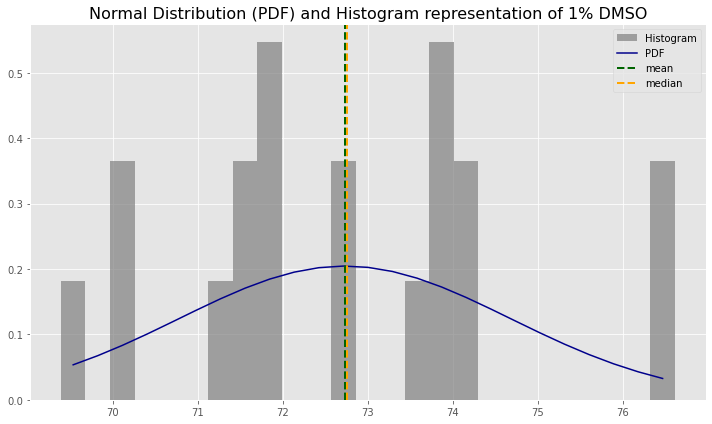

In [36]:
hist_pdf_plot(DT_DMSO_1, '1% DMSO')

#### **Plotting for 2.5% DMSO**

In [37]:
# List of Doubling Time for the 2% DMSO Treatments
DT_DMSO_2 = list((df_c[df_c.Treatment == "2.5% DMSO"]["DT inflection"]).reset_index(drop=True))

In [38]:
np.mean(DT_DMSO_2)

77.49135403555556

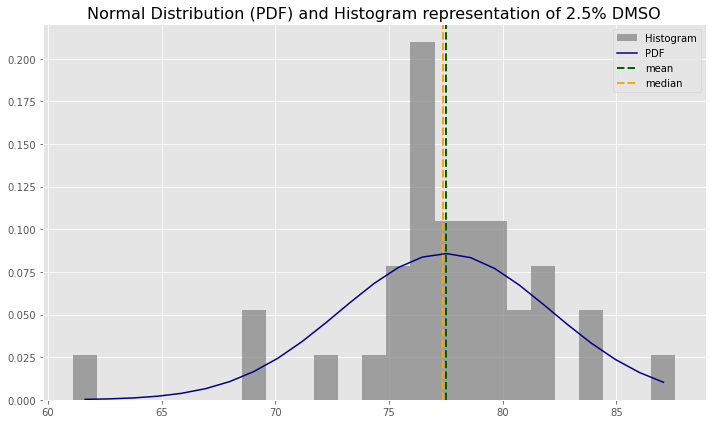

In [39]:
hist_pdf_plot(DT_DMSO_2, '2.5% DMSO')

#### **Plotting for 2.5 ng/mL Rapamycin**

In [76]:
# List of Doubling Time for the 2.5 ng/mL RAPA Treatments
DT_RAPA_1 = list((df_c[df_c.Treatment == "2.5 ng/mL RAPA"]["DT inflection"]).reset_index(drop=True))

In [71]:
DT_RAPA_1

[64.01317505,
 78.08836924,
 77.56189287,
 77.0972575,
 71.94150216,
 71.63159393,
 76.29003941,
 70.46324428,
 71.08819754,
 72.81271758,
 75.45713881,
 43.12589491]

In [72]:
np.mean(DT_RAPA_1)

70.79758527333333

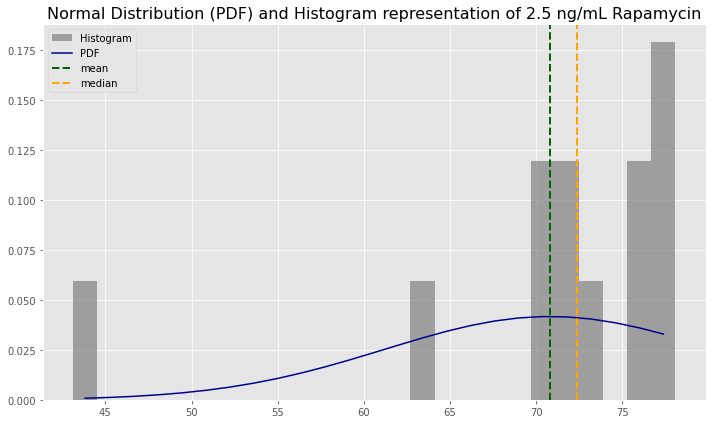

In [73]:
hist_pdf_plot(DT_RAPA_1, '2.5 ng/mL Rapamycin')  

#### **Plotting for 20 ng/mL Rapamycin**

In [75]:
# List of Doubling Time for the 20 ng/mL RAPA Treatments
DT_RAPA_2 = list((df_c[df_c.Treatment == "20 ng/mL RAPA"]["DT inflection"]).reset_index(drop=True))

In [77]:
DT_RAPA_2

[260.0471278,
 317.0612214,
 246.9491257,
 66.28004822,
 103.6058719,
 234.1072087,
 272.346412]

In [78]:
np.mean(DT_RAPA_2)

214.34243081714288

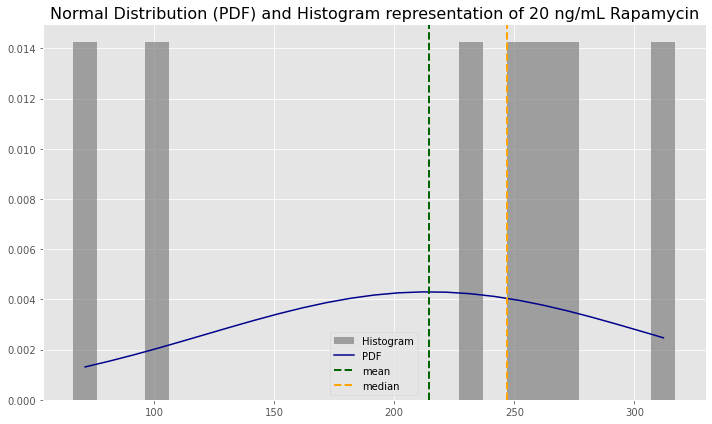

In [79]:
hist_pdf_plot(DT_RAPA_2, '20 ng/mL Rapamycin')

### Identifying Outliers

In [40]:
def Z_score(df, threshold=1):
    
    mean, std = np.mean(df), np.std(df)
    
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    
    new_treatment = [df[i] for i in range(len(df)) if good[i]]
    possible_outliers = [df[i] for i in range(len(df)) if not good[i]]
    
    # print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    
    return z_score, new_treatment, possible_outliers

#### **1% DMSO**

In [41]:
z_score1, new_DT1, possible_outliers1 = Z_score(DT_DMSO_1)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT1, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers1)

Rejection 5 points

Doubling Time with possible outliers removed :  [71.95654991, 71.80068565, 72.75335931, 71.22402774, 71.55013443, 73.5992666, 72.78558069, 71.63980236, 73.85627932, 74.28980159, 74.23962473, 73.92783866, 73.74407088, 71.72310359] 

Doubling Time of possible outliers :  [69.39323588, 76.61181509, 70.1853122, 76.35258739, 70.25372001]


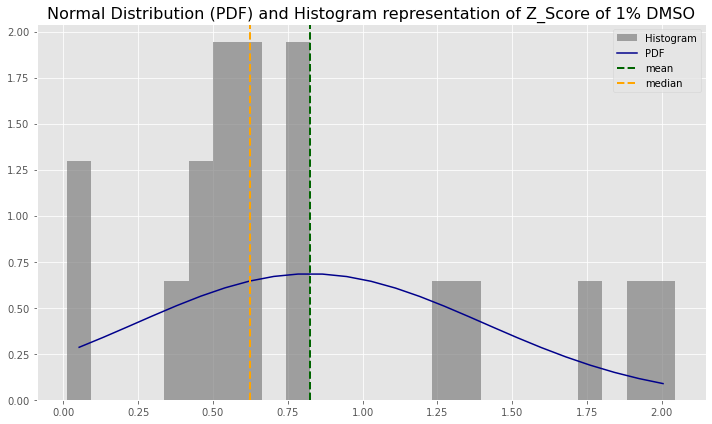

In [42]:
hist_pdf_plot(z_score1, 'Z_Score of 1% DMSO')

#### **2.5% DMSO**

In [43]:
z_score2, new_DT2, possible_outliers2 = Z_score(DT_DMSO_2)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT2, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers2)

Rejection 7 points

Doubling Time with possible outliers removed :  [75.80880433, 75.54400685, 77.37977975, 76.33855158, 79.9449928, 81.4684331, 78.64974328, 81.30649542, 79.70570942, 77.20347584, 76.87473325, 80.34060506, 76.48963591, 76.22787514, 76.3039197, 76.97978683, 81.50895056, 81.05003245, 79.12113992, 78.24745529, 77.3352617, 74.27269104, 77.81167031, 76.87661413, 76.47455606, 75.58075343, 78.21455271, 79.58370045, 80.18053203] 

Doubling Time of possible outliers :  [84.38310148, 68.88651677, 87.60139813, 61.10590795, 72.60216312, 83.71443923, 68.57076026]


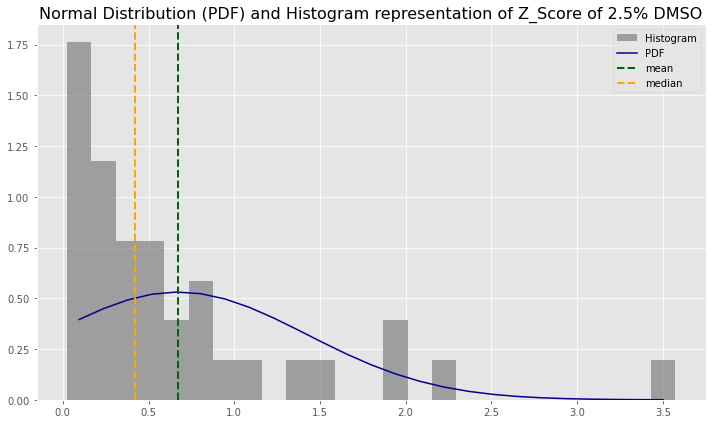

In [44]:
hist_pdf_plot(z_score2, 'Z_Score of 2.5% DMSO')

#### **2.5 ng/mL Rapamycin**

In [82]:
z_score3, new_DT3, possible_outliers3 = Z_score(DT_RAPA_1)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT3, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers3)

Rejection 1 points

Doubling Time with possible outliers removed :  [64.01317505, 78.08836924, 77.56189287, 77.0972575, 71.94150216, 71.63159393, 76.29003941, 70.46324428, 71.08819754, 72.81271758, 75.45713881] 

Doubling Time of possible outliers :  [43.12589491]


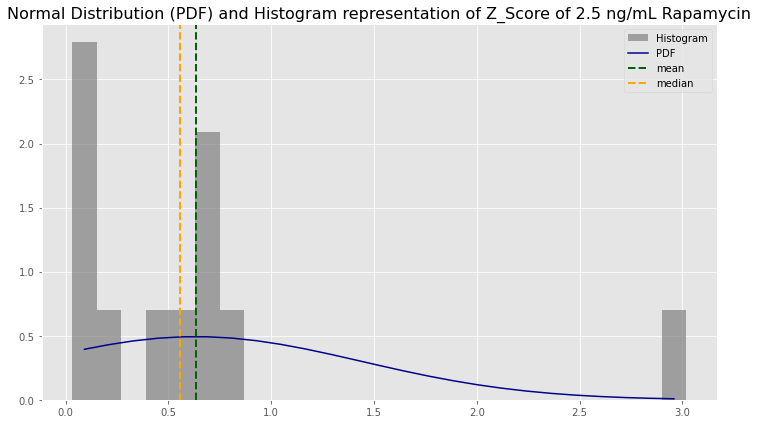

In [83]:
hist_pdf_plot(z_score3, 'Z_Score of 2.5 ng/mL Rapamycin')

#### **20 ng/mL Rapamycin**

In [102]:
z_score4, new_DT4, possible_outliers4 = Z_score(DT_RAPA_2, 1)
print(blue("\nDoubling Time with possible outliers removed : ", 'bold'), new_DT4, red("\n\nDoubling Time of possible outliers : ", 'bold'), possible_outliers4)

Rejection 3 points

Doubling Time with possible outliers removed :  [260.0471278, 246.9491257, 234.1072087, 272.346412] 

Doubling Time of possible outliers :  [317.0612214, 66.28004822, 103.6058719]


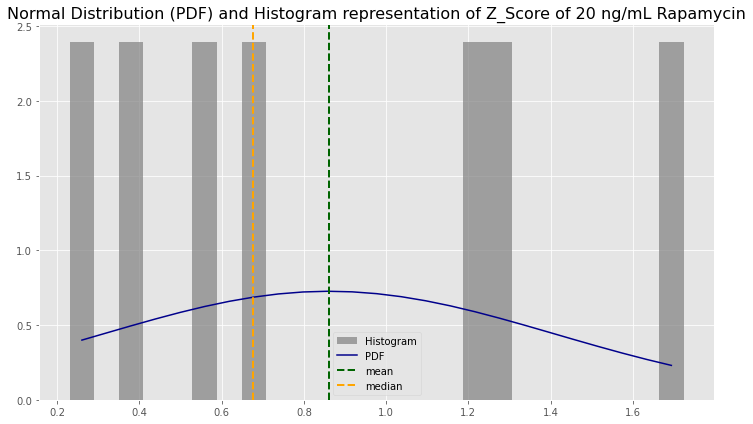

In [85]:
hist_pdf_plot(z_score4, 'Z_Score of 20 ng/mL Rapamycin')

### Check the relevance of the outlier test (Z_Score) perfomed for the different treatments' doubling time inflection data distribution.

Performing **T-test** to ascertain the validity of:
   1. **Null Hypothesis** :- The sample data distribution is not an outlier
   2. **Hypothesis** :- The sample data distribution is an outlier

#### **1% DMSO**

* Variables to test: **1% DMSO possible outliers in BY4743 strain** and (**1% DMSO for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [91]:
mean1 = np.mean(DT_DMSO_1)
std1 = np.std(DT_DMSO_1)
print(blue("Mean of DT_DMSO_1 : ", 'bold'), mean1, green("\nStandard Deviation of DT_DMSO_1 : ", 'bold'), std1)

Mean of DT_DMSO_1 :  72.73088400157893 
Standard Deviation of DT_DMSO_1 :  1.8982004281432756


In [46]:
stats.ttest_1samp(a = possible_outliers1, # Sample data
                  popmean = mean1)        # Pop mean

Ttest_1sampResult(statistic=-0.10660889366945275, pvalue=0.920232088307664)

In [47]:
stats.t.ppf(q=0.025,                        # Quantile to check
            df=(len(possible_outliers1)-1)) # Degrees of freedom

-2.7764451051977996

In [48]:
stats.t.ppf(q = 0.975,                        # Quantile to check
            df = (len(possible_outliers1)-1)) # Degrees of freedom

2.7764451051977987

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution of like our sample data is **92.02%**.

In [49]:
sigma = np.std(possible_outliers1)/len(possible_outliers1) # Sample stdev / sample size

stats.t.interval(alpha=0.95,                               # Confidence level
                 df = (len(DT_DMSO_1)-1),                  # Degrees of freedom
                 loc = np.mean(possible_outliers1),        # Sample mean
                 scale = sigma)

(71.20705316478417, 73.91161506321582)

Calculating for the **confidence interval** by taking a `95% confidence level` reveals to include the mean of the population sample (DT_DMSO_1), meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be concluded that there are no out of the ordinary doubling time measurements corresponding to 1% DMSO treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **2.5% DMSO**

* Variables to test: **2.5% DMSO possible outliers in BY4743 strain** and (**2.5% DMSO for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [90]:
mean2 = np.mean(DT_DMSO_2)
std2 = np.std(DT_DMSO_2)
print(blue("Mean of DT_DMSO_2 : ", 'bold'), mean2, green("\nStandard Deviation of DT_DMSO_2 : ", 'bold'), std2)

Mean of DT_DMSO_2 :  77.49135403555556 
Standard Deviation of DT_DMSO_2 :  4.587462823422111


In [51]:
stats.ttest_1samp(a = possible_outliers2, # Sample data
                  popmean = mean2)        # Pop mean

Ttest_1sampResult(statistic=-0.5887909331315235, pvalue=0.5774792929475171)

In [52]:
stats.t.ppf(q=0.025,                        # Quantile to check
            df=(len(possible_outliers2)-1)) # Degrees of freedom

-2.446911848791681

In [53]:
stats.t.ppf(q = 0.975,                        # Quantile to check
            df = (len(possible_outliers2)-1)) # Degrees of freedom

2.4469118487916806

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution like our sample data within the whole population distribution is **57.74%**.

In [54]:
sigma = np.std(possible_outliers2)/len(possible_outliers2) # Sample stdev / sample size

stats.t.interval(alpha=0.95,                               # Confidence level
                 df = (len(DT_DMSO_2)-1),                  # Degrees of freedom
                 loc = np.mean(possible_outliers2),        # Sample mean
                 scale = sigma)

(72.58178009664105, 77.95087331478753)

Working out for the **confidence interval** by taking a `95% confidence level`, it shows that the mean of the population sample (DT_DMSO_2) is within range, meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be surmised that there are no out of the ordinary doubling time measurements corresponding to 2.5% DMSO treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **2.5 ng/mL Rapamycin**

* Variables to test: **2.5 ng/mL Rapamycin possible outliers in BY4743 strain** and (**2.5 ng/mL Rapamycin for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [89]:
mean3 = np.mean(DT_RAPA_1)
std3 = np.std(DT_RAPA_1)
print(blue("Mean of DT_RAPA_1 : ", 'bold'), mean3, green("\nStandard Deviation of DT_RAPA_1 : ", 'bold'), std3)

Mean of DT_RAPA_1 :  70.79758527333333 
Standard Deviation of DT_RAPA_1 :  9.167367549298636


In [93]:
stats.ttest_1samp(a = possible_outliers3, # Sample data
                  popmean = mean3)        # Pop mean

Ttest_1sampResult(statistic=nan, pvalue=nan)

We have a `t-statistics` and `pvalue` of `nan` because the sample data distribution presented is just a single value.

> #### Since the second layer of outlier verification is not suitable for application, relying on the first level detection is a logical way to go forward. The possible outlier data point detected is, therefore, treated as an outlier. Accepting the alternative hypothesis leads us to believe that something unusual must have happened in the experiment corresponding to the outlier data point, and opens the possibility for further investigation.

#### **20 ng/mL Rapamycin**

* Variables to test: **20 ng/mL Rapamycin possible outliers in BY4743 strain** and (**20 ng/mL Rapamycin for both BY4743 strain and the total strain population**)
* Values : **Doubling Time**

In [95]:
mean4 = np.mean(DT_RAPA_2)
std4 = np.std(DT_RAPA_2)
print(blue("Mean of DT_RAPA_2 : ", 'bold'), mean4, green("\nStandard Deviation of DT_RAPA_2 : ", 'bold'), std4)

Mean of DT_RAPA_2 :  214.34243081714288 
Standard Deviation of DT_RAPA_2 :  85.8931468372651


In [97]:
stats.ttest_1samp(a = possible_outliers4, # Sample data
                  popmean = mean4)        # Pop mean

Ttest_1sampResult(statistic=-0.6659895082503774, pvalue=0.5739530297974219)

In [98]:
stats.t.ppf(q=0.025,                        # Quantile to check
            df=(len(possible_outliers4)-1)) # Degrees of freedom

-4.3026527299112765

In [99]:
stats.t.ppf(q=0.975,                        # Quantile to check
            df=(len(possible_outliers4)-1)) # Degrees of freedom

4.302652729911275

The t-statistics is **within the range** of the upper and lower quantiles, and the probability of encountering a data distribution like our sample data within the whole population distribution is **57.39%**.

In [103]:
sigma = np.std(possible_outliers4)/len(possible_outliers4) # Sample stdev / sample size

stats.t.interval(alpha=0.95,                               # Confidence level
                 df = (len(DT_RAPA_2)-1),                  # Degrees of freedom
                 loc = np.mean(possible_outliers4),        # Sample mean
                 scale = sigma)

(72.20610567496318, 252.4253220050369)

Working out for the **confidence interval** by taking a `95% confidence level`, it shows that the mean of the population sample (DT_RAPA_2) is within range, meaning we can **accept the null hypothesis** of considering the sample data distributions not being outliers.

> #### By accepting the null hypothesis, it can be surmised that there are no out of the ordinary doubling time measurements corresponding to 20 ng/mL Rapamycin treatments on the BY4743 strain that would lead as to believe there is something unusual about the corresponding experiments.

#### **NB :** It should be noted that by varying the value for the confidence level, a statistical significance could arise indicating the possible outliers are indeed one. This results in the acceptance of the alternative hypothesis, and inturn lead us to believe there is something interesting happening with the corresponding experiments performed. It should also be noted that the minimal data points presented for the total population and sample data distribution for the BY4743 strain is a hinderance for outlier identification.

### Comparing and plotting the growth rate of BY4743 strain agianst time in **1% DMSO**, **2.5% DMSO**, **2.5 ng/mL Rapamycin** and **20 ng/mL Rapamycin**

In [55]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [56]:
df_RAPA1 = pd.read_csv('./Data/By Treatment/Treatment_5.csv')
df_RAPA2 = pd.read_csv('./Data/By Treatment/Treatment_4.csv')
df_DMSO1 = pd.read_csv('./Data/By Treatment/Treatment_3.csv')
df_DMSO2 = pd.read_csv('./Data/By Treatment/Treatment_2.csv')

In [57]:
df_RAPA1_control = df_RAPA1[df_RAPA1['Strain'] == 'BY4743'].reset_index(drop=True)
df_RAPA2_control = df_RAPA2[df_RAPA2['Strain'] == 'BY4743'].reset_index(drop=True)
df_DMSO1_control = df_DMSO1[df_DMSO1['Strain'] == 'BY4743'].reset_index(drop=True)
df_DMSO2_control = df_DMSO2[df_DMSO2['Strain'] == 'BY4743'].reset_index(drop=True)

In [58]:
df_RAPA1_control

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5 ng/mL Rapa,64.013175,2.594965,83.988136,3.220114,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
1,SET3_Low Rapa_REDO_MGK_081117.xls,WT-2.5 ng/ml RAPA,78.088369,0.383663,80.376903,2.150477,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.040667,0.043333,0.051000,0.065000,0.083000,0.106000,0.139000,0.182000,0.234333,0.303667,0.393333,0.494333,0.615000,0.733000,0.853000,0.968333,1.058333,1.107667,1.108667,1.114000,1.123333,1.130667,1.141667,1.152000,1.164000,1.179000,1.191667,1.209667,1.223333,1.245333,1.263333,1.284667,1.305333,1.324667,1.341667,1.360333,1.379333,1.397333,1.415333
2,SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG...,WT-2.5 ng/ml RAPA,77.561893,3.355332,89.770834,3.545155,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.043333,0.046000,0.049333,0.057000,0.069000,0.085667,0.111333,0.139333,0.181333,0.234000,0.293667,0.368000,0.449000,0.536667,0.631667,0.731333,0.829667,0.921667,1.005333,1.067000,1.118000,1.143667,1.156333,1.169333,1.181333,1.199333,1.216000,1.236667,1.257667,1.282333,1.306000,1.330333,1.351333,1.375667,1.397667,1.416667,1.435000,1.452000,1.468667,1.483667
3,SGRP_mTORinhibits_SET2_lowRAPA_KGPUMBL_080417....,WT-2.5 ng/ml RAPA,77.097257,0.437107,81.161361,0.575085,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.054667,0.058000,0.063667,0.073667,0.088667,0.107667,0.134667,0.173333,0.220667,0.289000,0.375000,0.483000,0.611333,0.753000,0.891333,1.014333,1.114333,1.184667,1.215667,1.227000,1.233333,1.238333,1.244333,1.249000,1.255333,1.260000,1.266333,1.275667,1.286333,1.299667,1.313333,1.331333,1.348667,1.370000,1.389333,1.411000,1.433333,1.454000,1.473333,1.494333
4,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-2.5 ng/ml RAPA,71.941502,1.365780,72.825664,1.189565,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
5,SGRP_mTORinhibitsSCREEN_SET1_LOWRAPA_highRAPA_...,yML 742-2.5 ng/ml RAPA,71.631594,1.187630,73.752719,0.695045,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.038667,0.043667,0.051000,0.061000,0.076667,0.097000,0.125333,0.164000,0.216667,0.289667,0.380000,0.489333,0.617000,0.759000,0.901333,1.024000,1.125000,1.181333,1.194333,1.205000,1.215333,1.225000,1.234000,1.243667,1.253000,1.261333,1.271000,1.283667,1.299000,1.314333,1.332667,1.350667,1.370333,1.391000,1.412000,1.433667,1.455333,1.475667,1.495000,1.514000
6,SGRP_mTORinhibitsSCREEN_SET1_lowRAPA_round4_KG...,WT-2.5 ng/ml RAPA,76.290039,3.106836,77.893450,2.691584,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.047667,0.054667,0.063667,0.080667,0.100667,0.131000,0.169333,0.222000,0.289000,0.376000,0.482333,0.605333,0.744667,0.881667,1.006000,1.107333,1.180333,1.225667,1.243667,1.251667,1.261333,1.269667,1.281000,1.286667,1.295000,1.306333,1.316000,1.327000,1.338

In [59]:
df_RAPA2_control

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
1,SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTori...,yML 742-20 ng/ml RAPA,317.061221,11.396644,540.860914,32.967754,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.034000,0.038000,0.042000,0.044000,0.046333,0.048667,0.052667,0.056667,0.060000,0.063667,0.067667,0.071333,0.076333,0.080667,0.084333,0.090000,0.095333,0.100000,0.106333,0.111333,0.117333,0.124000,0.130667,0.137667,0.144333,0.152333,0.160000,0.167667,0.175000,0.184667,0.191333,0.200000,0.210000,0.217000,0.226000,0.235000,0.246667,0.256000,0.265667,0.275667
2,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-20 ng/ml RAPA,246.949126,23.923174,425.958663,61.086824,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038667,0.044000,0.052000,0.060000,0.065333,0.074000,0.082000,0.091000,0.099333,0.108667,0.118333,0.128000,0.141000,0.151667,0.163667,0.174667,0.188333,0.201333,0.216000,0.229333,0.245333,0.258667,0.274333,0.290667,0.307333,0.324000,0.339333,0.355333,0.371333,0.389667,0.406000,0.423000,0.440333,0.458000,0.475667,0.493667,0.508667,0.526333,0.544000,0.563333
3,SGRP_mTORinhibitsSCREEN_SET1_LOWRAPA_highRAPA_...,yML 742-20 ng/ml RAPA,66.280048,1.170398,67.474769,1.769920,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.040000,0.043000,0.045000,0.048333,0.052333,0.056000,0.061333,0.067667,0.077000,0.089000,0.108333,0.136000,0.179333,0.243000,0.332333,0.453667,0.598000,0.747000,0.872667,0.979333,1.062333,1.125333,1.170333,1.204667,1.232333,1.253333,1.270667,1.285000,1.295000,1.302333,1.307333,1.309667,1.310000,1.308667,1.310667,1.304000,1.301000,1.292000,1.284000
4,SGRP_mTORinhibitsSCREEN_SET1HIGHrapaANDhighTOR...,yML742-20 ng/mL Rapamycin,103.605872,7.568691,660.406587,126.750274,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.028333,0.033667,0.041667,0.049333,0.056333,0.066667,0.072667,0.076667,0.083667,0.091333,0.142333,0.107667,0.117667,0.127000,0.141667,0.148333,0.155667,0.176333,0.179000,0.192000,0.206667,0.213333,0.227333,0.237667,0.249333,0.304333,0.279667,0.285333,0.298333,0.311667,0.321000,0.334667,0.345333,0.358667,0.366333,0.383333,0.393333,0.405333,0.416333,0.430667
5,SGRP_mTORinhibitsSCREEN_Set2_highRAPA_KGPU_112...,WT-20 ng/ml RAPA,234.107209,13.572955,435.355752,37.430549,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.032333,0.037000,0.042667,0.048667,0.053667,0.059333,0.065333,0.072333,0.079000,0.086667,0.093667,0.101333,0.110000,0.117000,0.127667,0.136667,0.146667,0.157000,0.168000,0.180667,0.193000,0.206333,0.219000,0.234000,0.247000,0.261000,0.276333,0.292333,0.308000,0.323333,0.339333,0.355667,0.371000,0.386667,0.404333,0.421667,0.438667,0.454667,0.471667,0.490333
6,SGRP_mTORinhibitsSCREEN_SET3_round3_highRAPA_K...,WT-20 ng/ml RAPA,272.346412,22.955615,534.470140,2.515240,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.040333,0.045333,0.050000,0.054000,0.058000,0.062667,0.067000,0.071000,0.076333,0.081667,0.086333,0.092667,0.098000,0.104000,0.111000,0.116667,0.125000,0.130667,0.139000,0.146667,0.150667,0.162667,0.171000,0.179333,0.188333,0.197000,0.2

In [60]:
df_DMSO1_control

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
1,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1%DMSO,69.393236,2.539779,77.138745,3.599276,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
2,SET3_Low Rapa_REDO_MGK_081117.xls,WT-vehicle,71.800686,3.114633,82.620660,2.702329,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.044333,0.046667,0.056000,0.073000,0.093333,0.117333,0.158000,0.207333,0.261333,0.342667,0.441667,0.553000,0.676667,0.795333,0.907000,1.009000,1.066000,1.078667,1.078667,1.086333,1.094667,1.098333,1.109333,1.117667,1.128333,1.145667,1.151667,1.161333,1.171000,1.185000,1.193667,1.209000,1.221667,1.234333,1.241667,1.256667,1.271333,1.285000,1.297667
3,SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG...,WT-vehicle,72.753359,4.556768,76.990288,0.606452,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.047667,0.050000,0.054000,0.063667,0.077000,0.098333,0.126000,0.163667,0.217000,0.286000,0.369000,0.471333,0.585333,0.711000,0.834667,0.948333,1.032333,1.075333,1.082667,1.090333,1.092667,1.101667,1.109333,1.118333,1.129333,1.138000,1.151000,1.159000,1.170333,1.183333,1.194000,1.205667,1.215667,1.228000,1.237000,1.250667,1.259333,1.270333,1.281000,1.293333
4,SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTori...,yML 742-1% DMSO,71.224028,2.020860,73.509534,0.462129,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.039000,0.045000,0.055333,0.068667,0.090000,0.117000,0.155333,0.207333,0.274333,0.363333,0.467333,0.589667,0.710000,0.834667,0.948333,1.027667,1.059000,1.059333,1.065333,1.072000,1.078000,1.087000,1.098000,1.106667,1.116000,1.125667,1.140000,1.149333,1.160000,1.171333,1.182667,1.193667,1.206667,1.217667,1.230333,1.241333,1.254333,1.267667,1.280000,1.292000
5,SGRP_mTORinhibits_SET2_lowRAPA_KGPUMBL_080417....,WT-vehicle,76.611815,1.777645,78.834509,2.397538,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.055333,0.060000,0.068000,0.080667,0.096667,0.120667,0.153000,0.197333,0.255667,0.335333,0.436667,0.557000,0.695333,0.837333,0.962333,1.067333,1.132000,1.168000,1.176333,1.182000,1.189000,1.192667,1.200000,1.202333,1.211333,1.214667,1.223333,1.230333,1.239667,1.251333,1.262667,1.276667,1.289000,1.301333,1.314667,1.328000,1.342333,1.354333,1.371667,1.388000
6,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-1% DMSO,71.550134,0.362163,73.668221,1.045512,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038667,0.043000,0.050000,0.060667,0.078000,0.101667,0.135667,0.181000,0.240667,0.317333,0.413000,0.525000,0.644333,0.764000,0.889667,0.985000,1.047667,1.080667,1.087000,1.096667,1.101333,1.113000,1.120333,1.129667,1.140333,1.150667,1.161667,1.171667,1.183000,1.193000,1.203667,1.214000,1.225667,1.237667,1.248667,1.260000,1.271333,1.285000,1.296333,1.307333
7,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-1

In [61]:
df_DMSO2_control

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
1,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5%DMSO,75.808804,2.918282,85.705342,2.026005,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.035667,0.038333,0.043667,0.050333,0.046667,0.074333,0.097000,0.126000,0.167000,0.217667,0.275000,0.346667,0.429667,0.525333,0.617667,0.717333,0.811000,0.889667,0.933000,0.943333,0.945333,0.955333,0.960000,0.966667,0.975667,0.985667,0.992000,1.002667,1.010667,1.023667,1.034000,1.042667,1.051667,1.064667,1.071333,1.083333,1.093000,1.102667,1.111333,1.122667
2,SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls,WT-vehicle,75.544007,3.017342,80.790763,1.830439,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.036000,0.041333,0.049667,0.059333,0.075333,0.097333,0.126667,0.163667,0.215333,0.277333,0.358667,0.454000,0.560333,0.678000,0.793667,0.905333,0.999333,1.069333,1.092000,1.096000,1.101333,1.115667,1.118000,1.127667,1.141000,1.148333,1.160000,1.170333,1.183000,1.195333,1.204000,1.214333,1.226333,1.237333,1.249667,1.260333,1.272000,1.281000,1.291333,1.303000
3,SET1GDC_ARMBL_080217.xls,WT-vehicle,68.886517,0.623195,70.409317,0.866966,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.039333,0.046000,0.057000,0.070000,0.095333,0.133667,0.183000,0.244667,0.328667,0.433000,0.554333,0.690333,0.839000,0.996000,1.092667,1.112667,1.134000,1.151667,1.176667,1.207667,1.236333,1.266333,1.300000,1.332000,1.366333,1.393667,1.423667,1.450000,1.475667,1.503333,1.521000,1.544667,1.561000,1.576000,1.596000,1.609667,1.626000,1.641667,1.650000,1.660667
4,SET2AZDredo+highTORINMBL_07302017.xls,WT-vehicle,77.379780,1.141481,85.542929,1.364424,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.029667,0.034667,0.040333,0.046000,0.058333,0.078667,0.096333,0.127667,0.169000,0.213000,0.278667,0.351667,0.443000,0.550667,0.664333,0.778000,0.889333,0.983667,1.044667,1.051000,1.053000,1.057000,1.071333,1.079333,1.086000,1.101333,1.106333,1.118000,1.127000,1.142000,1.152667,1.159333,1.175000,1.184333,1.194333,1.205667,1.214333,1.221667,1.236333,1.245667
5,SET4_highTORIN_REDO_NBMBL_080717.xls,WT-2.5% DMSO,76.338552,0.756310,79.320736,0.984777,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.035000,0.038000,0.044000,0.053333,0.068000,0.087667,0.114000,0.149000,0.195667,0.257000,0.332000,0.422000,0.531333,0.645000,0.763667,0.868333,0.970667,1.039667,1.062000,1.067333,1.074000,1.077333,1.085333,1.096667,1.106000,1.117000,1.126333,1.137667,1.150000,1.162333,1.174000,1.186000,1.197000,1.207333,1.220000,1.232000,1.242333,1.253333,1.264667,1.275667
6,SGRP_mTOR_inhibitsSCREEN_SET1_GDC_redo_JE_0926...,WT-vehicle,79.944993,2.104810,81.864947,1.803296,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.042333,0.050000,0.062000,0.078333,0.100667,0.131667,0.169333,0.219667,0.283000,0.363000,0.455000,0.560667,0.667000,0.771000,0.867000,0.933667,0.985000,1.000000,1.007000,1.019667,1.030667,1.043000,1.056000,1.072333,1.087667,1.103000,1.117000,1.136000,1.152667,1.173000,1.186667,1.204667,1.220333,1.237000,1.253000,1.267000,1.284667,1.297000,1.313667,1.329000
7,SGRP_mTOR_inhibitsSCREEN_SET1_highgdc-0941_AR_...,yML742-vehicle,81.468433,2.8674

#### The outlier identified from the previous tests in 2.5 ng/mL Rapamycin is present in `df_RAPA1_control`, so we remove that observation before proceeding to averaging out the values.

In [105]:
possible_outliers3

[43.12589491]

In [129]:
df_RAPA1_control = df_RAPA1_control[df_RAPA1_control['DT inflection'] != possible_outliers3[0]]

In [130]:
df_RAPA1_control

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5 ng/mL Rapa,64.013175,2.594965,83.988136,3.220114,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
1,SET3_Low Rapa_REDO_MGK_081117.xls,WT-2.5 ng/ml RAPA,78.088369,0.383663,80.376903,2.150477,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.040667,0.043333,0.051000,0.065000,0.083000,0.106000,0.139000,0.182000,0.234333,0.303667,0.393333,0.494333,0.615000,0.733000,0.853000,0.968333,1.058333,1.107667,1.108667,1.114000,1.123333,1.130667,1.141667,1.152000,1.164000,1.179000,1.191667,1.209667,1.223333,1.245333,1.263333,1.284667,1.305333,1.324667,1.341667,1.360333,1.379333,1.397333,1.415333
2,SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG...,WT-2.5 ng/ml RAPA,77.561893,3.355332,89.770834,3.545155,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.043333,0.046000,0.049333,0.057000,0.069000,0.085667,0.111333,0.139333,0.181333,0.234000,0.293667,0.368000,0.449000,0.536667,0.631667,0.731333,0.829667,0.921667,1.005333,1.067000,1.118000,1.143667,1.156333,1.169333,1.181333,1.199333,1.216000,1.236667,1.257667,1.282333,1.306000,1.330333,1.351333,1.375667,1.397667,1.416667,1.435000,1.452000,1.468667,1.483667
3,SGRP_mTORinhibits_SET2_lowRAPA_KGPUMBL_080417....,WT-2.5 ng/ml RAPA,77.097257,0.437107,81.161361,0.575085,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.054667,0.058000,0.063667,0.073667,0.088667,0.107667,0.134667,0.173333,0.220667,0.289000,0.375000,0.483000,0.611333,0.753000,0.891333,1.014333,1.114333,1.184667,1.215667,1.227000,1.233333,1.238333,1.244333,1.249000,1.255333,1.260000,1.266333,1.275667,1.286333,1.299667,1.313333,1.331333,1.348667,1.370000,1.389333,1.411000,1.433333,1.454000,1.473333,1.494333
4,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-2.5 ng/ml RAPA,71.941502,1.365780,72.825664,1.189565,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
5,SGRP_mTORinhibitsSCREEN_SET1_LOWRAPA_highRAPA_...,yML 742-2.5 ng/ml RAPA,71.631594,1.187630,73.752719,0.695045,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.038667,0.043667,0.051000,0.061000,0.076667,0.097000,0.125333,0.164000,0.216667,0.289667,0.380000,0.489333,0.617000,0.759000,0.901333,1.024000,1.125000,1.181333,1.194333,1.205000,1.215333,1.225000,1.234000,1.243667,1.253000,1.261333,1.271000,1.283667,1.299000,1.314333,1.332667,1.350667,1.370333,1.391000,1.412000,1.433667,1.455333,1.475667,1.495000,1.514000
6,SGRP_mTORinhibitsSCREEN_SET1_lowRAPA_round4_KG...,WT-2.5 ng/ml RAPA,76.290039,3.106836,77.893450,2.691584,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.047667,0.054667,0.063667,0.080667,0.100667,0.131000,0.169333,0.222000,0.289000,0.376000,0.482333,0.605333,0.744667,0.881667,1.006000,1.107333,1.180333,1.225667,1.243667,1.251667,1.261333,1.269667,1.281000,1.286667,1.295000,1.306333,1.316000,1.327000,1.338

In [131]:
drop_features = ['experiment', 'Line-Treatment', 'Lab strain', 'Strain', 'Treatment', 'Strain*Treatment'] 

In [132]:
RAPA1_control = df_RAPA1_control.drop(drop_features, axis=1)
RAPA2_control = df_RAPA2_control.drop(drop_features, axis=1)
DMSO1_control = df_DMSO1_control.drop(drop_features, axis=1)
DMSO2_control = df_DMSO2_control.drop(drop_features, axis=1)

In [133]:
RAPA1_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,64.013175,2.594965,83.988136,3.220114,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
1,78.088369,0.383663,80.376903,2.150477,0,0.036667,0.040667,0.043333,0.051000,0.065000,0.083000,0.106000,0.139000,0.182000,0.234333,0.303667,0.393333,0.494333,0.615000,0.733000,0.853000,0.968333,1.058333,1.107667,1.108667,1.114000,1.123333,1.130667,1.141667,1.152000,1.164000,1.179000,1.191667,1.209667,1.223333,1.245333,1.263333,1.284667,1.305333,1.324667,1.341667,1.360333,1.379333,1.397333,1.415333
2,77.561893,3.355332,89.770834,3.545155,0,0.043333,0.046000,0.049333,0.057000,0.069000,0.085667,0.111333,0.139333,0.181333,0.234000,0.293667,0.368000,0.449000,0.536667,0.631667,0.731333,0.829667,0.921667,1.005333,1.067000,1.118000,1.143667,1.156333,1.169333,1.181333,1.199333,1.216000,1.236667,1.257667,1.282333,1.306000,1.330333,1.351333,1.375667,1.397667,1.416667,1.435000,1.452000,1.468667,1.483667
3,77.097257,0.437107,81.161361,0.575085,0,0.054667,0.058000,0.063667,0.073667,0.088667,0.107667,0.134667,0.173333,0.220667,0.289000,0.375000,0.483000,0.611333,0.753000,0.891333,1.014333,1.114333,1.184667,1.215667,1.227000,1.233333,1.238333,1.244333,1.249000,1.255333,1.260000,1.266333,1.275667,1.286333,1.299667,1.313333,1.331333,1.348667,1.370000,1.389333,1.411000,1.433333,1.454000,1.473333,1.494333
4,71.941502,1.365780,72.825664,1.189565,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
5,71.631594,1.187630,73.752719,0.695045,0,0.038667,0.043667,0.051000,0.061000,0.076667,0.097000,0.125333,0.164000,0.216667,0.289667,0.380000,0.489333,0.617000,0.759000,0.901333,1.024000,1.125000,1.181333,1.194333,1.205000,1.215333,1.225000,1.234000,1.243667,1.253000,1.261333,1.271000,1.283667,1.299000,1.314333,1.332667,1.350667,1.370333,1.391000,1.412000,1.433667,1.455333,1.475667,1.495000,1.514000
6,76.290039,3.106836,77.893450,2.691584,0,0.047667,0.054667,0.063667,0.080667,0.100667,0.131000,0.169333,0.222000,0.289000,0.376000,0.482333,0.605333,0.744667,0.881667,1.006000,1.107333,1.180333,1.225667,1.243667,1.251667,1.261333,1.269667,1.281000,1.286667,1.295000,1.306333,1.316000,1.327000,1.338667,1.350667,1.363000,1.376333,1.393000,1.410333,1.428667,1.448333,1.473667,1.497333,1.519667,1.543000
7,70.463244,1.109997,73.498258,0.888125,0,0.033000,0.037000,0.041000,0.049333,0.063333,0.084000,0.110667,0.150000,0.201000,0.267667,0.351333,0.454333,0.575333,0.705000,0.829667,0.950333,1.047667,1.100333,1.106000,1.111667,1.121333,1.129000,1.139667,1.150333,1.160667,1.171667,1.183333,1.197333,1.212667,1.227667,1.244667,1.261000,1.280000,1.298000,1.316667,1.333667,1.348000,1.364333,1.381333,1.396667
8,71.088198,1.631667,74.545128,0.424365,0,0.029333,0.033000,0.038667,0.049000,0.064000,0.084333,0.111667,0.149000,0.200000,0.263333,0.346333,0.447667,0.568000,0.694000,0.819000,0.936667,1.036000,1.092333,1.104333,1.108667,1.115667,1.124000,1.135667,1.145333,1.158000,1.168333,1.182000,1.197667,1.212333,1.230333,1.249000,1.266000,1.285667,1.304000,1.319333,1.337667,1.353333,1.370000,1.387

In [134]:
RAPA2_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,260.047128,11.569153,470.258578,21.283503,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
1,317.061221,11.396644,540.860914,32.967754,0,0.034000,0.038000,0.042000,0.044000,0.046333,0.048667,0.052667,0.056667,0.060000,0.063667,0.067667,0.071333,0.076333,0.080667,0.084333,0.090000,0.095333,0.100000,0.106333,0.111333,0.117333,0.124000,0.130667,0.137667,0.144333,0.152333,0.160000,0.167667,0.175000,0.184667,0.191333,0.200000,0.210000,0.217000,0.226000,0.235000,0.246667,0.256000,0.265667,0.275667
2,246.949126,23.923174,425.958663,61.086824,0,0.038667,0.044000,0.052000,0.060000,0.065333,0.074000,0.082000,0.091000,0.099333,0.108667,0.118333,0.128000,0.141000,0.151667,0.163667,0.174667,0.188333,0.201333,0.216000,0.229333,0.245333,0.258667,0.274333,0.290667,0.307333,0.324000,0.339333,0.355333,0.371333,0.389667,0.406000,0.423000,0.440333,0.458000,0.475667,0.493667,0.508667,0.526333,0.544000,0.563333
3,66.280048,1.170398,67.474769,1.769920,0,0.038333,0.040000,0.043000,0.045000,0.048333,0.052333,0.056000,0.061333,0.067667,0.077000,0.089000,0.108333,0.136000,0.179333,0.243000,0.332333,0.453667,0.598000,0.747000,0.872667,0.979333,1.062333,1.125333,1.170333,1.204667,1.232333,1.253333,1.270667,1.285000,1.295000,1.302333,1.307333,1.309667,1.310000,1.308667,1.310667,1.304000,1.301000,1.292000,1.284000
4,103.605872,7.568691,660.406587,126.750274,0,0.028333,0.033667,0.041667,0.049333,0.056333,0.066667,0.072667,0.076667,0.083667,0.091333,0.142333,0.107667,0.117667,0.127000,0.141667,0.148333,0.155667,0.176333,0.179000,0.192000,0.206667,0.213333,0.227333,0.237667,0.249333,0.304333,0.279667,0.285333,0.298333,0.311667,0.321000,0.334667,0.345333,0.358667,0.366333,0.383333,0.393333,0.405333,0.416333,0.430667
5,234.107209,13.572955,435.355752,37.430549,0,0.032333,0.037000,0.042667,0.048667,0.053667,0.059333,0.065333,0.072333,0.079000,0.086667,0.093667,0.101333,0.110000,0.117000,0.127667,0.136667,0.146667,0.157000,0.168000,0.180667,0.193000,0.206333,0.219000,0.234000,0.247000,0.261000,0.276333,0.292333,0.308000,0.323333,0.339333,0.355667,0.371000,0.386667,0.404333,0.421667,0.438667,0.454667,0.471667,0.490333
6,272.346412,22.955615,534.470140,2.515240,0,0.040333,0.045333,0.050000,0.054000,0.058000,0.062667,0.067000,0.071000,0.076333,0.081667,0.086333,0.092667,0.098000,0.104000,0.111000,0.116667,0.125000,0.130667,0.139000,0.146667,0.150667,0.162667,0.171000,0.179333,0.188333,0.197000,0.207000,0.216333,0.224000,0.237000,0.245000,0.254000,0.264667,0.275667,0.289333,0.300667,0.312000,0.323000,0.335000,0.348667


In [135]:
DMSO1_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,71.956550,1.083065,74.768422,2.232198,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
1,69.393236,2.539779,77.138745,3.599276,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
2,71.800686,3.114633,82.620660,2.702329,0,0.038000,0.044333,0.046667,0.056000,0.073000,0.093333,0.117333,0.158000,0.207333,0.261333,0.342667,0.441667,0.553000,0.676667,0.795333,0.907000,1.009000,1.066000,1.078667,1.078667,1.086333,1.094667,1.098333,1.109333,1.117667,1.128333,1.145667,1.151667,1.161333,1.171000,1.185000,1.193667,1.209000,1.221667,1.234333,1.241667,1.256667,1.271333,1.285000,1.297667
3,72.753359,4.556768,76.990288,0.606452,0,0.047667,0.050000,0.054000,0.063667,0.077000,0.098333,0.126000,0.163667,0.217000,0.286000,0.369000,0.471333,0.585333,0.711000,0.834667,0.948333,1.032333,1.075333,1.082667,1.090333,1.092667,1.101667,1.109333,1.118333,1.129333,1.138000,1.151000,1.159000,1.170333,1.183333,1.194000,1.205667,1.215667,1.228000,1.237000,1.250667,1.259333,1.270333,1.281000,1.293333
4,71.224028,2.020860,73.509534,0.462129,0,0.039000,0.045000,0.055333,0.068667,0.090000,0.117000,0.155333,0.207333,0.274333,0.363333,0.467333,0.589667,0.710000,0.834667,0.948333,1.027667,1.059000,1.059333,1.065333,1.072000,1.078000,1.087000,1.098000,1.106667,1.116000,1.125667,1.140000,1.149333,1.160000,1.171333,1.182667,1.193667,1.206667,1.217667,1.230333,1.241333,1.254333,1.267667,1.280000,1.292000
5,76.611815,1.777645,78.834509,2.397538,0,0.055333,0.060000,0.068000,0.080667,0.096667,0.120667,0.153000,0.197333,0.255667,0.335333,0.436667,0.557000,0.695333,0.837333,0.962333,1.067333,1.132000,1.168000,1.176333,1.182000,1.189000,1.192667,1.200000,1.202333,1.211333,1.214667,1.223333,1.230333,1.239667,1.251333,1.262667,1.276667,1.289000,1.301333,1.314667,1.328000,1.342333,1.354333,1.371667,1.388000
6,71.550134,0.362163,73.668221,1.045512,0,0.038667,0.043000,0.050000,0.060667,0.078000,0.101667,0.135667,0.181000,0.240667,0.317333,0.413000,0.525000,0.644333,0.764000,0.889667,0.985000,1.047667,1.080667,1.087000,1.096667,1.101333,1.113000,1.120333,1.129667,1.140333,1.150667,1.161667,1.171667,1.183000,1.193000,1.203667,1.214000,1.225667,1.237667,1.248667,1.260000,1.271333,1.285000,1.296333,1.307333
7,70.185312,2.801380,72.519742,1.574369,0,0.036333,0.040667,0.047000,0.056000,0.070333,0.092667,0.122333,0.162333,0.216667,0.287667,0.378000,0.484667,0.607667,0.733667,0.857000,0.967333,1.045000,1.093667,1.111000,1.116000,1.122667,1.131333,1.139333,1.150000,1.159333,1.168667,1.180000,1.190000,1.200333,1.212667,1.225667,1.236667,1.249000,1.262000,1.274667,1.285667,1.299667,1.312333,1.325333,1.337000
8,73.599267,1.765772,75.464563,0.458218,0,0.038667,0.042667,0.050000,0.060667,0.077000,0.098667,0.129667,0.170667,0.225667,0.297333,0.389000,0.499000,0.626667,0.765000,0.899667,1.019000,1.103000,1.147333,1.153333,1.162667,1.172000,1.182667,1.190000,1.199333,1.206667,1.215667,1.225667,1.236000,1.248000,1.261667,1.275000,1.290333,1.305000,1.321333,1.337000,1.352667,1.368333,1.385667,1.398

In [136]:
DMSO2_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,84.383101,4.532748,90.556861,2.269390,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
1,75.808804,2.918282,85.705342,2.026005,0,0.035667,0.038333,0.043667,0.050333,0.046667,0.074333,0.097000,0.126000,0.167000,0.217667,0.275000,0.346667,0.429667,0.525333,0.617667,0.717333,0.811000,0.889667,0.933000,0.943333,0.945333,0.955333,0.960000,0.966667,0.975667,0.985667,0.992000,1.002667,1.010667,1.023667,1.034000,1.042667,1.051667,1.064667,1.071333,1.083333,1.093000,1.102667,1.111333,1.122667
2,75.544007,3.017342,80.790763,1.830439,0,0.036000,0.041333,0.049667,0.059333,0.075333,0.097333,0.126667,0.163667,0.215333,0.277333,0.358667,0.454000,0.560333,0.678000,0.793667,0.905333,0.999333,1.069333,1.092000,1.096000,1.101333,1.115667,1.118000,1.127667,1.141000,1.148333,1.160000,1.170333,1.183000,1.195333,1.204000,1.214333,1.226333,1.237333,1.249667,1.260333,1.272000,1.281000,1.291333,1.303000
3,68.886517,0.623195,70.409317,0.866966,0,0.039333,0.046000,0.057000,0.070000,0.095333,0.133667,0.183000,0.244667,0.328667,0.433000,0.554333,0.690333,0.839000,0.996000,1.092667,1.112667,1.134000,1.151667,1.176667,1.207667,1.236333,1.266333,1.300000,1.332000,1.366333,1.393667,1.423667,1.450000,1.475667,1.503333,1.521000,1.544667,1.561000,1.576000,1.596000,1.609667,1.626000,1.641667,1.650000,1.660667
4,77.379780,1.141481,85.542929,1.364424,0,0.029667,0.034667,0.040333,0.046000,0.058333,0.078667,0.096333,0.127667,0.169000,0.213000,0.278667,0.351667,0.443000,0.550667,0.664333,0.778000,0.889333,0.983667,1.044667,1.051000,1.053000,1.057000,1.071333,1.079333,1.086000,1.101333,1.106333,1.118000,1.127000,1.142000,1.152667,1.159333,1.175000,1.184333,1.194333,1.205667,1.214333,1.221667,1.236333,1.245667
5,76.338552,0.756310,79.320736,0.984777,0,0.035000,0.038000,0.044000,0.053333,0.068000,0.087667,0.114000,0.149000,0.195667,0.257000,0.332000,0.422000,0.531333,0.645000,0.763667,0.868333,0.970667,1.039667,1.062000,1.067333,1.074000,1.077333,1.085333,1.096667,1.106000,1.117000,1.126333,1.137667,1.150000,1.162333,1.174000,1.186000,1.197000,1.207333,1.220000,1.232000,1.242333,1.253333,1.264667,1.275667
6,79.944993,2.104810,81.864947,1.803296,0,0.042333,0.050000,0.062000,0.078333,0.100667,0.131667,0.169333,0.219667,0.283000,0.363000,0.455000,0.560667,0.667000,0.771000,0.867000,0.933667,0.985000,1.000000,1.007000,1.019667,1.030667,1.043000,1.056000,1.072333,1.087667,1.103000,1.117000,1.136000,1.152667,1.173000,1.186667,1.204667,1.220333,1.237000,1.253000,1.267000,1.284667,1.297000,1.313667,1.329000
7,81.468433,2.867466,86.325412,3.016394,0,0.032333,0.034333,0.037333,0.042333,0.056333,0.069667,0.085333,0.107667,0.141667,0.182667,0.233000,0.294667,0.372667,0.461667,0.560000,0.666000,0.770333,0.869000,0.956667,1.016333,1.033333,1.040333,1.051333,1.060667,1.073333,1.083333,1.099667,1.111667,1.124333,1.138333,1.153333,1.166333,1.178000,1.189000,1.200667,1.214000,1.226667,1.237333,1.245667,1.256667
8,78.649743,0.913624,82.336697,1.073074,0,0.033333,0.038333,0.045000,0.053333,0.067000,0.086333,0.110667,0.148333,0.192333,0.249333,0.320667,0.405667,0.507667,0.622333,0.731667,0.841667,0.944333,1.021000,1.052667,1.054333,1.063667,1.072000,1.082000,1.091333,1.104667,1.112667,1.122000,1.137333,1.147667,1.158667,1.171000,1.182667,1.194333,1.204333,1.215000,1.226667,1.235333,1.247333,1.257

In [146]:
# avg_RAPA1_control = pd.DataFrame(RAPA1_control.mean())
# avg_RAPA2_control = pd.DataFrame(RAPA2_control.mean())
# avg_DMSO1_control = pd.DataFrame(DMSO1_control.mean())
# avg_DMSO2_control = pd.DataFrame(DMSO2_control.mean())


avg_RAPA1_control = RAPA1_control.mean()
avg_RAPA2_control = RAPA2_control.mean()
avg_DMSO1_control = DMSO1_control.mean()
avg_DMSO2_control = DMSO2_control.mean()

In [147]:
avg_RAPA1_control

DT inflection    73.313193
StDev_inf         1.831827
DT interval      78.350381
StDev_int         1.719586
Time_0            0.000000
Time_0.5          0.039970
Time_1            0.044242
Time_1.5          0.050303
Time_2            0.060818
Time_2.5          0.076394
Time_3            0.099879
Time_3.5          0.130091
Time_4            0.170970
Time_4.5          0.225697
Time_5            0.294182
Time_5.5          0.380545
Time_6            0.483606
Time_6.5          0.600727
Time_7            0.724061
Time_7.5          0.843879
Time_8            0.952121
Time_8.5          1.039152
Time_9            1.095333
Time_9.5          1.118030
Time_10           1.130061
Time_10.5         1.141909
Time_11           1.152212
Time_11.5         1.161333
Time_12           1.170848
Time_12.5         1.181273
Time_13           1.193030
Time_13.5         1.205545
Time_14           1.219758
Time_14.5         1.235364
Time_15           1.251818
Time_15.5         1.269424
Time_16           1.286970
T

In [153]:
avg_control = pd.DataFrame((avg_RAPA1_control, avg_RAPA2_control, avg_DMSO1_control, avg_DMSO2_control), index=['RAPA1', 'RAPA2', 'DMSO1', 'DMSO2'])

In [154]:
avg_control

,DT inflection,StDev_inf,DT interval,StDev_int,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
RAPA1,73.313193,1.831827,78.350381,1.719586,0.0,0.039970,0.044242,0.050303,0.060818,0.076394,0.099879,0.130091,0.170970,0.225697,0.294182,0.380545,0.483606,0.600727,0.724061,0.843879,0.952121,1.039152,1.095333,1.118030,1.130061,1.141909,1.152212,1.161333,1.170848,1.181273,1.193030,1.205545,1.219758,1.235364,1.251818,1.269424,1.286970,1.305212,1.324515,1.342818,1.360667,1.378818,1.396394,1.413727,1.430758
RAPA2,214.342431,13.165233,447.826486,40.543438,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
DMSO1,72.730884,2.158362,76.765604,2.192335,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
DMSO2,77.491354,2.176891,82.826506,1.792261,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528


### Time Graph Analysis

In [159]:
avg_control_time = avg_control.drop(['DT inflection', 'StDev_inf', 'DT interval', 'StDev_int'], axis=1)

In [160]:
avg_control_time

,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
RAPA1,0.0,0.039970,0.044242,0.050303,0.060818,0.076394,0.099879,0.130091,0.170970,0.225697,0.294182,0.380545,0.483606,0.600727,0.724061,0.843879,0.952121,1.039152,1.095333,1.118030,1.130061,1.141909,1.152212,1.161333,1.170848,1.181273,1.193030,1.205545,1.219758,1.235364,1.251818,1.269424,1.286970,1.305212,1.324515,1.342818,1.360667,1.378818,1.396394,1.413727,1.430758
RAPA2,0.0,0.035762,0.040000,0.045714,0.050714,0.055286,0.061095,0.066333,0.071857,0.078143,0.085095,0.098619,0.101429,0.112524,0.125095,0.142143,0.161381,0.186381,0.216190,0.244762,0.271524,0.295762,0.316476,0.335190,0.351571,0.366048,0.386095,0.394333,0.406286,0.418714,0.431810,0.442667,0.454714,0.465905,0.477000,0.488048,0.501000,0.511381,0.522190,0.532905,0.544810
DMSO1,0.0,0.040421,0.045404,0.052526,0.063982,0.080246,0.104719,0.136404,0.178649,0.234211,0.304228,0.392123,0.495491,0.610404,0.730053,0.846649,0.948035,1.021491,1.062930,1.077228,1.085772,1.094982,1.105035,1.114877,1.123807,1.134561,1.145368,1.158298,1.170333,1.183491,1.196140,1.209070,1.221333,1.233561,1.246561,1.259228,1.271491,1.284930,1.298123,1.310596,1.323509
DMSO2,0.0,0.039380,0.044917,0.052759,0.063444,0.078620,0.101343,0.130157,0.168343,0.218444,0.279806,0.357204,0.444889,0.545926,0.655111,0.763648,0.863426,0.949815,1.016139,1.056352,1.074593,1.084722,1.095204,1.106491,1.117287,1.129028,1.142611,1.153565,1.165907,1.178824,1.192444,1.205046,1.217759,1.230639,1.242833,1.254898,1.267778,1.279250,1.290963,1.302000,1.312528


In [163]:
def time_graph_RAPA_DMSO(r, rapa):
    
    fig1, ax1 = plt.subplots(figsize=(20,5))
    fig2, (ax3, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
    fig3, ax4 = plt.subplots(figsize=(20,10))
    
    y_val_DMSO1 = avg_control_time.iloc[2].values.tolist()
    y_val_DMSO2 = avg_control_time.iloc[3].values.tolist()
    y_val_RAPA = avg_control_time.iloc[r].values.tolist()
    x_val = np.arange(0, len(avg_control_time.columns.values.tolist())/2, 0.5)
    
    ax1.plot(x_val, y_val_RAPA)
    ax3.plot(x_val, y_val_DMSO1)
    ax2.plot(x_val, y_val_DMSO2)
    ax4.plot(x_val, y_val_DMSO1, label="1% DMSO")
    ax4.plot(x_val, y_val_DMSO2, label="2.5% DMSO")
    ax4.plot(x_val, y_val_RAPA, label=rapa)

    ax1.set_title("\n\nTime-Growth Graph\n[" + rapa + "]\n", fontsize=16)
    ax1.set_xlabel("\nTime")
    ax1.set_ylabel("Population Density")
    
    ax2.set_title("\nTime-Growth Graph\n[2.5% DMSO]\n", fontsize=16)
    ax2.set_xlabel("\nTime")
    
    ax3.set_title("\nTime-Growth Graph\n[1% DMSO]\n", fontsize=16)
    ax3.set_xlabel("\nTime")
    ax3.set_ylabel("Population Density")
    
    ax4.set_title("\nTime-Growth Graph\n[" + rapa + "] vs. [1% DMSO] vs. [2.5% DMSO]\n", fontsize=16)
    ax4.set_xlabel("\nTime")
    ax4.set_ylabel("Population Density")
    
    ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax4.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax4.legend()
    
    plt.xticks(x_val, rotation=40)
    plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_DMSO2), max(y_val_RAPA)) + 0.1, 0.1)))
    
    plt.tight_layout()

    return plt.show()

In [172]:
def percentage(index, df):
    DMSO1_DT = df['DT inflection'].iloc[2]
    DMSO2_DT = df['DT inflection'].iloc[3]
    RAPA_DT = df['DT inflection'].iloc[index]
    
    RAPA_DMSO1_percent = f"{((RAPA_DT - DMSO1_DT) / DMSO1_DT) * 100} %"
    RAPA_DMSO2_percent = f"{((RAPA_DT - DMSO2_DT) / DMSO2_DT) * 100} %"
    
    return RAPA_DMSO1_percent, RAPA_DMSO2_percent

#### Time-Graph for **`2.5 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

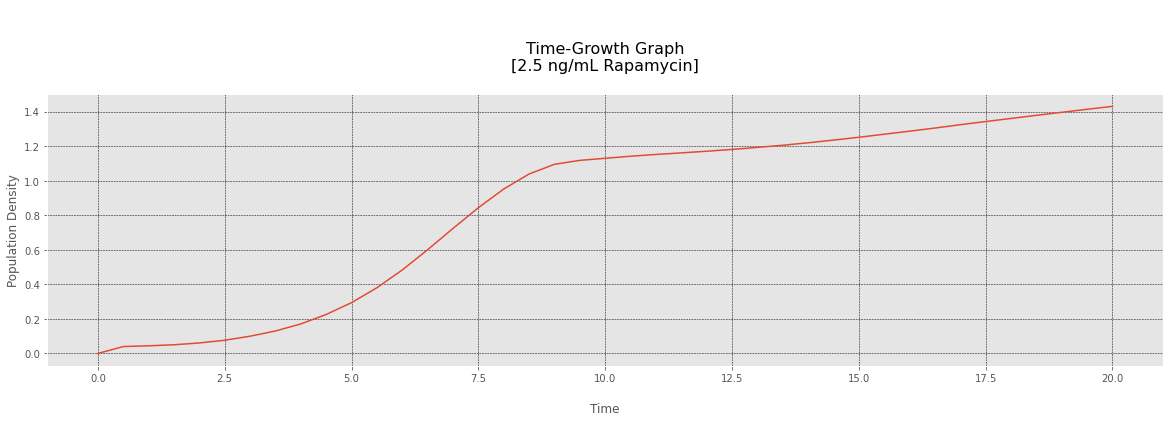

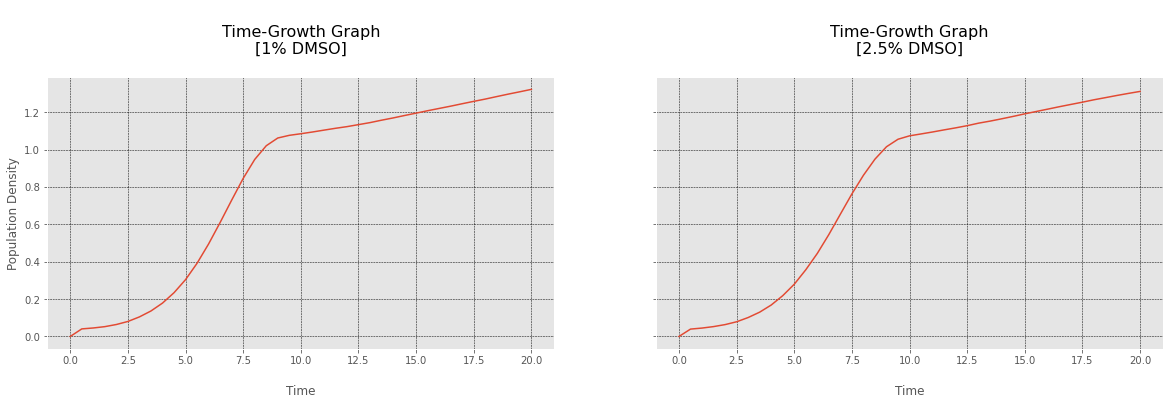

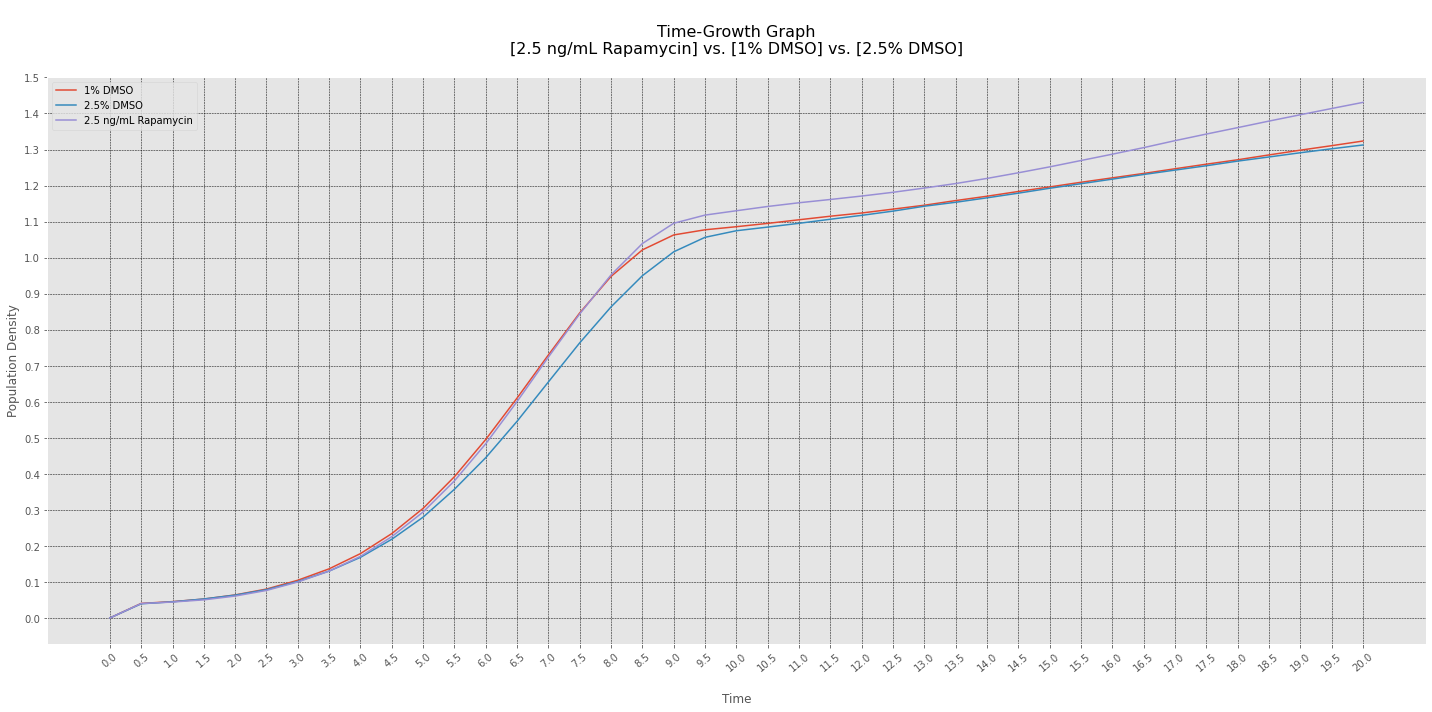

In [164]:
time_graph_RAPA_DMSO(r=0, rapa="2.5 ng/mL Rapamycin")

In [175]:
RAPA_DMSO1_percent, RAPA_DMSO2_percent = percentage(0, avg_control)
print(blue("Doubling time effect of 2.5 ng/mL Rapamycin", 'bold'), green("\n\n1% DMSO as the primary control : ", 'bold'), RAPA_DMSO1_percent, green("\n2.5% DMSO as the primary control : ", 'bold'), RAPA_DMSO2_percent)

Doubling time effect of 2.5 ng/mL Rapamycin 

1% DMSO as the primary control :  0.8006357884915214 % 
2.5% DMSO as the primary control :  -5.391776410896962 %


#### Time-Graph for **`20 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

In [ ]:
# Function that creates a DataFrame from selected few experiments
def mapper(exp, te, feature):
    dfs = list()
    for i in exp:
        dfs.append(te.loc[(te[feature] == i)])
    dfs = pd.concat(dfs, ignore_index=True)
    return dfs

In [ ]:
aneww = (df_Control[(df_Control['Treatment'] == treatments[1]) | (df_Control['Treatment'] == treatments[2]) | (df_Control['Treatment'] == treatments[3]) | (df_Control['Treatment'] == treatments[4])])
aneww

In [ ]:
aneww.experiment.value_counts()

In [ ]:
# filter dataset by treatment, where the treatments being targeted are: 2.5% DMSO, 1% DMSO, 20 ng/mL RAPA and 2.5 ng/mL RAPA
te = (df_Control[(df_Control['Treatment'] == treatments[1]) | (df_Control['Treatment'] == treatments[2]) | (df_Control['Treatment'] == treatments[3]) | (df_Control['Treatment'] == treatments[4])]) # & (df_Control['Line-Treatment'] == 'WT-1 uM Torin 1')]).reset_index(drop=True)

# filter experiments that don't pertain to the corresponding DMSO to RAPA treatment. This is done by removing experiments whose count don't exceed one.
    # Lists of experiments whose counts/presence in the 'te' dataframe is more than one.
exp = [te.experiment.value_counts().keys().tolist()[index] for index, i in enumerate(te.experiment.value_counts()) if i > 1]
te = mapper(exp, te, 'experiment')

In [ ]:
[te.experiment.value_counts().keys().tolist()[index] for index, i in enumerate(te.experiment.value_counts()) if i > 1]

In [ ]:
te

### Time Graph Analysis

#### Time graph for **`SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin`** experiment

In [ ]:
features_to_drop = ['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf', 'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment', 'Strain*Treatment']
features_to_drop2 = ['experiment', 'Line-Treatment', 'StDev_inf', 'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment']

te1 = te[te.experiment == 'SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin'].drop(features_to_drop, axis=1)
te1_2 = te[te.experiment == 'SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin'].drop(features_to_drop2, axis=1)

In [ ]:
te1

In [ ]:
te1_2

In [ ]:
np.arange(0, len(te1.columns.values.tolist())/2, 0.5)

In [ ]:
def time_graph_DMSO_RAPA(y1, y2, y3, rapa):
    
    fig1, ax1 = plt.subplots(figsize=(20,5))
    fig2, (ax3, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
    fig3, ax4 = plt.subplots(figsize=(20,10))
    
    y_val_DMSO1 = te1.iloc[y1].values.tolist()
    y_val_DMSO2 = te1.iloc[y2].values.tolist()
    y_val_RAPA = te1.iloc[y3].values.tolist()
    x_val = np.arange(0, len(te1.columns.values.tolist())/2, 0.5)
    
    ax1.plot(x_val, y_val_RAPA)
    ax3.plot(x_val, y_val_DMSO1)
    ax2.plot(x_val, y_val_DMSO2)
    ax4.plot(x_val, y_val_DMSO1, label="1% DMSO")
    ax4.plot(x_val, y_val_DMSO2, label="2.5% DMSO")
    ax4.plot(x_val, y_val_RAPA, label=rapa)

    ax1.set_title("\n\nTime-Growth Graph\n[" + rapa + "]\n", fontsize=16)
    ax1.set_xlabel("\nTime")
    ax1.set_ylabel("Population Density")
    
    ax2.set_title("\nTime-Growth Graph\n[2.5% DMSO]\n", fontsize=16)
    ax2.set_xlabel("\nTime")
    
    ax3.set_title("\nTime-Growth Graph\n[1% DMSO]\n", fontsize=16)
    ax3.set_xlabel("\nTime")
    ax3.set_ylabel("Population Density")
    
    ax4.set_title("\nTime-Growth Graph\n[" + rapa + "] vs. [1% DMSO] vs. [2.5% DMSO]\n", fontsize=16)
    ax4.set_xlabel("\nTime")
    ax4.set_ylabel("Population Density")
    
    ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax4.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax4.legend()
    
    plt.xticks(x_val, rotation=40)
    plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_DMSO2), max(y_val_RAPA)) + 0.1, 0.1)))
    
    plt.tight_layout()

    return plt.show()

In [ ]:
def percent(y1, y2, y3, df):
    DMSO1_DT = df['DT inflection'].iloc[y1]
    DMSO2_DT = df['DT inflection'].iloc[y2]
    RAPA_DT = df['DT inflection'].iloc[y3]
    
    DMSO1_percent = f"{((DMSO1_DT - RAPA_DT) / RAPA_DT) * 100} %"
    DMSO2_percent = f"{((DMSO2_DT - RAPA_DT) / RAPA_DT) * 100} %"
    
    return DMSO1_percent, DMSO2_percent

#### Time-Graph for **`2.5 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

In [ ]:
y1_1 = 0
y2_1 = 3
y3_1 = 2

In [ ]:
time_graph_DMSO_RAPA(y1=y1_1, y2=y2_1, y3=y3_1, rapa="2.5 ng/mL Rapamycin")

In [ ]:
DMSO1_1_percent, DMSO2_1_percent = percent(y1_1, y2_1, y3_1, te1_2)
print("1% DMSO effect : ", DMSO1_1_percent, "\n2.5% DMSO effect : ", DMSO2_1_percent)

**1% DMSO** treatment shows a **0.54%** less doubling time effect, where as the **2.5% DMSO** treatment has a **6.06%** increase in the doubling time.

The graphical representation and percentage analysis show that a treatment free of the vehicle agents in a solution containing **`2.5 ng/mL Rapamycin`** has the highest population growth rate. It can also be seen that a vehicle of **`2.5% DMSO`** in the solution treatment tends to have a higher population growth rate compared to the **`1% DMSO`** solution.

#### Time-Graph for **`20 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

In [ ]:
y1_2 = 1
y2_2 = 4
y3_2 = 5

In [ ]:
time_graph_DMSO_RAPA(y1=y1_2, y2=y2_2, y3=y3_2, rapa="20 ng/mL Rapamycin")

In [ ]:
DMSO1_2_percent, DMSO2_2_percent = percent(y1_2, y2_2, y3_2, te1_2)
print("1% DMSO effect : ", DMSO1_2_percent, "\n2.5% DMSO effect : ", DMSO2_2_percent)

In [ ]:
te1_2['DT inflection'].iloc[y3_2]

**1% DMSO** treatment has a **71.57%** less doubling time. Similarily, **2.5% DMSO** experiences a **68.82%** less doubling time effect.

Analysis of the graphical representation and doubling time effects in percentage show that a treatment solution of **`20 ng/mL Rapamycin`** alone has the lowest population growth rate compared to its DMSO vehicle comprising solutions. And it is clear that the yeast strain thrives in the **`1% DMSO`** solution treatment than the **`2.5% DMSO`** solution.

> Based on the above two observations it can be surmised that the application of the **`DMSO`** vehicle has effect on the growth rate of a population, but an ordinance to what concentration, or even the presence of it, will have a constant increasing or decreasing outcome on the population size cannot be determined.

### Rapamycin Effect (%)

If we can get our hands on the neutral growth rate (neutral being without any treatment being applied to the strain), we can set the original doubling time to it. And we can evaluate the effect each treatment has in percent, and then compute for the difference among treatments.

###  Analysis of the relationship between **Treatment** and **Doubling Time** on a particular experiment for the Control group

Get the unique treatments on the Lab strain for the different experiments.

In [ ]:
dt_treat = ({treatments[0] : })

In [ ]:
dt_t = df_Control[['DT inflection', 'Treatment']]
dt_t.groupby(['Treatment']).mean()

In [ ]:
t_c_df = df_Control.drop_duplicates(subset='Treatment').reset_index(drop=True)
t_c_df.drop(['experiment', 'Line-Treatment', 'StDev_int', 'DT interval', 'Lab strain', 'Strain*Treatment'], axis=1, inplace=True)
t_c_df

In [ ]:
dr_f = ['DT inflection', 'StDev_inf', 'Strain', 'Treatment']
one = (t_c_df.iloc[0]).drop(dr_f)
two = (t_c_df.iloc[1]).drop(dr_f)
three = (t_c_df.iloc[2]).drop(dr_f)
four = (t_c_df.iloc[3]).drop(dr_f)
five = (t_c_df.iloc[4]).drop(dr_f)
six = (t_c_df.iloc[5]).drop(dr_f)
seven = (t_c_df.iloc[6]).drop(dr_f)
eight = (t_c_df.iloc[7]).drop(dr_f)
nine = (t_c_df.iloc[8]).drop(dr_f)
ten = (t_c_df.iloc[9]).drop(dr_f)

In [ ]:
d = t_c_df.drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'], axis=1)
d_plot = list()
for i in range(10):
    d_plot.append([j + (t_c_df['DT inflection'].iloc[i]) for j in d.iloc[i]])

In [ ]:
d_plot

In [ ]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15,20))

flier = dict(markerfacecolor='green', marker='D')
# mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

g = sns.boxplot(data=d_plot, #pd.concat([one, two, three, four, five, six, seven, eight, nine, ten], axis=1), 
                width=.7, 
                flierprops=flier)
                # showmeans=True,
                # meanprops=mean_shape)

xvalues = ["1 µM Torin 1", "2.5% DMSO", "1% DMSO", "20 ng/mL RAPA", "2.5 ng/mL RAPA", "6.67% H2O", "25 µM Torin 1", "100 µM GDC0941", "1 mg/mL Caffeine", "100 µM AZD8055"]
plt.xticks(np.arange(10), xvalues, rotation=40)
plt.yticks(np.arange(50,300,20))
# plt.yticks(np.arange(54, 300, 75)) #d_plot)  #[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 250, 255, 260, 265])

# setting title
plt.title("BY4743", fontsize=16)
# x and y labels
plt.xlabel("Treatments", fontsize=14)
plt.ylabel("Doubling Time\n(Minutes/cell division)", fontsize=14)

# set colors for the box plots
palette = ['#B7C3D0', '#60d147', '#60d147', "#d35de3", "#d35de3", '#B7C3D0', '#B7C3D0', '#B7C3D0', '#B7C3D0', '#B7C3D0']
color_dict = dict(zip(xvalues, palette))
for i in range(0,10):
    mybox = g.patches[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

# Mini text showing mean and standard deviation
locs = [-0.45, 0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]

for j in range(10):
    mean = round((t_c_df.iloc[j].drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])).mean(), 1)
    std = round((t_c_df.iloc[j].drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])).std(), 1)
    dt_inf = round(t_c_df['DT inflection'][j], 1)
    textstr = "$\overline {x}$" + f" = {mean} \nstd = {std} \nDT_inf = {dt_inf}"
    props = dict(boxstyle='round', facecolor=palette[j], alpha=.2)
    g.text(locs[j], 52.4, textstr, fontsize=12, bbox=props)

#remove spines
sns.despine(top=True, right=True, left=True, bottom=False)

plt.tight_layout()

plt.show()